# TEST V


In [21]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HouseholdMOD import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

In [20]:
# Create an instance of the model for question 1
model = HouseholdSpecializationModelClass()
model.par.alpha = 0.5
model.par.sigma = 1
name = model.solve_discrete(do_print=True)
print(name)

LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000
namespace(LM=4.5, HM=4.5, LF=4.5, HF=4.5)


## Question 1 (GPT)

In [1]:
from HouseholdMOD import HouseholdSpecializationModelClass
import numpy as np

# create model
model = HouseholdSpecializationModelClass()

# set up alpha and sigma values to loop through
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

# set up array to store results
ratio_results = np.zeros((len(alpha_vals), len(sigma_vals)))

# loop through alpha and sigma values and solve model for each combination
for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        # set model parameters
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve model
        sol = model.solve_discrete()
        
        # store ratio of HF to HM
        ratio_results[i, j] = sol.HF / sol.HM
        
# print results
print("Ratio of HF to HM:")
print(ratio_results)


/Users/vg/Desktop/projects-2023-valros/inauguralproject/HouseholdMOD.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Ratio of HF to HM:
[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


### Plot the ratios in a "Heatmap"

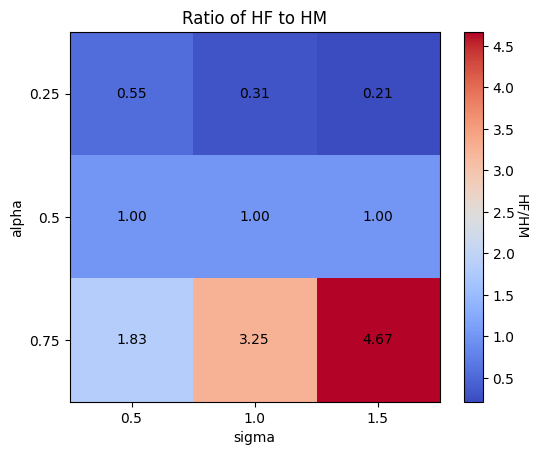

In [6]:
import matplotlib.pyplot as plt

# create heatmap of ratios
fig, ax = plt.subplots()
im = ax.imshow(ratio_results, cmap='coolwarm')

# set tick labels
ax.set_xticks(np.arange(len(sigma_vals)))
ax.set_yticks(np.arange(len(alpha_vals)))
ax.set_xticklabels(sigma_vals)
ax.set_yticklabels(alpha_vals)
ax.set_xlabel('sigma')
ax.set_ylabel('alpha')

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('HF/HM', rotation=270, labelpad=10)

# loop over data and add annotations
for i in range(len(alpha_vals)):
    for j in range(len(sigma_vals)):
        text = ax.text(j, i, f"{ratio_results[i, j]:.2f}",
                       ha="center", va="center", color="black")

# set plot title
plt.title("Ratio of HF to HM")

# show plot
plt.show()
